In [ ]:
import matplotlib.pylab as plt
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [ ]:
oc = pd.read_excel("/content/indicadoressegurancapublicauf.xlsx", sheet_name = 0)
oc.to_csv('ocorrenciaestados.csv')

vi = pd.read_excel('/content/indicadoressegurancapublicauf.xlsx', sheet_name = 1)
vi.to_csv('vit.csv')

Estupro ='1';

Furto de veículo'2';

Homicídio doloso='3': O homicídio doloso é quando uma pessoa mata outra intencionalmente.

Lesão corporal seguida de morte='4';

Roubo a instituição financeira='5';

Roubo de carga='6';

Roubo de veículo='7';

latrocínio='8' : assalto à mão armada no qual o efeito da arma pode não ir além da intimidação.
2.
homicídio com objetivo de roubo, ou roubo seguido de morte ou de graves lesões corporais da vítima.;

Tentativa de homicídio='9';


In [ ]:
ocorrencias = pd.read_csv('/content/ocorrenciaestados.csv')
ocorrencias = ocorrencias.drop('Unnamed: 0', axis=1)
ocorrencias.columns = ['uf', 'crime', 'ano', 'mes', 'ocorrencias']
ocorrencias['ano'] = ocorrencias['ano'].astype(int)
ocorrencias

,uf,crime,ano,mes,ocorrencias
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0
...,...,...,...,...,...
23015,Tocantins,Roubo a instituição financeira,2015,dezembro,6
23016,Tocantins,Roubo de carga,2015,dezembro,1
23017,Tocantins,Roubo de veículo,2015,dezembro,55
23018,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2


In [ ]:
# Organizando as regiões
regiao = pd.DataFrame({})
regiao = ocorrencias['uf'].astype(str)
regiao[regiao.str.contains("Acre")]='no';regiao[regiao.str.contains("Amazonas")]='no';regiao[regiao.str.contains("Amapá")]='no';regiao[regiao.str.contains("Rondônia")]='no';regiao[regiao.str.contains("Roraima")]='no';regiao[regiao.str.contains("Tocantins")]='no';regiao[regiao.str.contains("Pará")]='no'
regiao[regiao.str.contains("Maranhão")]='ne';regiao[regiao.str.contains("Piauí")]='ne';regiao[regiao.str.contains("Ceará")]='ne';regiao[regiao.str.contains("Rio Grande do Norte")]='ne';regiao[regiao.str.contains("Paraíba")]='ne';regiao[regiao.str.contains("Pernambuco")]='ne';regiao[regiao.str.contains("Alagoas")]='ne';regiao[regiao.str.contains("Sergipe")]='ne';regiao[regiao.str.contains("Bahia")]='ne'
regiao[regiao.str.contains("Goiás")]='co';regiao[regiao.str.contains("Distrito Federal")]='co';regiao[regiao.str.contains("Mato Grosso do Sul")]='co';regiao[regiao.str.contains("Mato Grosso")]='co'
regiao[regiao.str.contains("Espírito Santo")]='se';regiao[regiao.str.contains("Minas Gerais")]='se';regiao[regiao.str.contains("Rio de Janeiro")]='se';regiao[regiao.str.contains("São Paulo")]='se'
regiao[regiao.str.contains("Paraná")]='su';regiao[regiao.str.contains("Santa Catarina")]='su';regiao[regiao.str.contains("Rio Grande do Sul")]='su'
ocorrencias['regiao'] = regiao

# Organizando os estados
uf2 = pd.DataFrame({})
uf2 = ocorrencias['uf'].astype(str)
uf2[uf2.str.contains("Acre")]='ac';uf2[uf2.str.contains("Amazonas")]='am';uf2[uf2.str.contains("Amapá")]='ap';uf2[uf2.str.contains("Rondônia")]='ro';uf2[uf2.str.contains("Roraima")]='rr';uf2[uf2.str.contains("Tocantins")]='to';uf2[uf2.str.contains("Pará")]='pa'
uf2[uf2.str.contains("Maranhão")]='ma';uf2[uf2.str.contains("Piauí")]='pi';uf2[uf2.str.contains("Ceará")]='ce';uf2[uf2.str.contains("Rio Grande do Norte")]='rn';uf2[uf2.str.contains("Paraíba")]='pb';uf2[uf2.str.contains("Pernambuco")]='pe';uf2[uf2.str.contains("Alagoas")]='al';uf2[uf2.str.contains("Sergipe")]='se';uf2[uf2.str.contains("Bahia")]='ba'
uf2[uf2.str.contains("Goiás")]='go';uf2[uf2.str.contains("Distrito Federal")]='df';uf2[uf2.str.contains("Mato Grosso do Sul")]='ms';uf2[uf2.str.contains("Mato Grosso")]='mt'
uf2[uf2.str.contains("Espírito Santo")]='es';uf2[uf2.str.contains("Minas Gerais")]='mg';uf2[uf2.str.contains("Rio de Janeiro")]='rj';uf2[uf2.str.contains("São Paulo")]='sp'
uf2[uf2.str.contains("Paraná")]='pr';uf2[uf2.str.contains("Santa Catarina")]='sc';uf2[uf2.str.contains("Rio Grande do Sul")]='rs'
ocorrencias['uf'] = uf2

# organizando os tipos de crime para int
crime2 = pd.DataFrame({})
crime2 = ocorrencias['crime'].astype(str)
crime2[crime2.str.contains("Estupro")]='1';
crime2[crime2.str.contains("Furto de veículo")]='2';
crime2[crime2.str.contains("Homicídio doloso")]='3';
crime2[crime2.str.contains("Lesão corporal seguida de morte")]='4';
crime2[crime2.str.contains("Roubo a instituição financeira")]='5';
crime2[crime2.str.contains("Roubo de carga")]='6';
crime2[crime2.str.contains("Roubo de veículo")]='7';
crime2[crime2.str.contains("latrocínio")]='8';
crime2[crime2.str.contains("Tentativa de homicídio")]='9';
crime2 = crime2.astype(int)
ocorrencias['crime'] = crime2



mes = pd.DataFrame({})
mes = ocorrencias['mes'].astype(str)
mes[mes.str.contains("jan")]='jan'
mes[mes.str.contains("fev")]='fev'
mes[mes.str.contains("mar")]='mar'
mes[mes.str.contains("abr")]='abr'
mes[mes.str.contains("mai")]='mai'
mes[mes.str.contains("jun")]='jun'
mes[mes.str.contains("jul")]='jul'
mes[mes.str.contains("ago")]='ago'
mes[mes.str.contains("set")]='set'
mes[mes.str.contains("out")]='out'
mes[mes.str.contains("nov")]='nov'
mes[mes.str.contains("dez")]='dez'
ocorrencias['mes'] = mes

ocorrencias

,uf,crime,ano,mes,ocorrencias,regiao
0,ac,1,2022,jan,31,no
1,ac,2,2022,jan,50,no
2,ac,3,2022,jan,10,no
3,ac,4,2022,jan,1,no
4,ac,5,2022,jan,0,no
...,...,...,...,...,...,...
23015,to,5,2015,dez,6,no
23016,to,6,2015,dez,1,no
23017,to,7,2015,dez,55,no
23018,to,8,2015,dez,2,no


In [ ]:
vit = pd.read_csv('/content/vit.csv') #vitimas

vit = vit.drop('Unnamed: 0', axis=1)
vit.columns = ['uf', 'crime', 'ano', 'mes','sexo_vitima', 'vitimas']
vit['ano'] = vit['ano'].astype(int)

In [ ]:




regiao = pd.DataFrame({})
regiao = vit['uf'].astype(str)
regiao[regiao.str.contains("Acre")]='no';regiao[regiao.str.contains("Amazonas")]='no';regiao[regiao.str.contains("Amapá")]='no';regiao[regiao.str.contains("Rondônia")]='no';regiao[regiao.str.contains("Roraima")]='no';regiao[regiao.str.contains("Tocantins")]='no';regiao[regiao.str.contains("Pará")]='no'
regiao[regiao.str.contains("Maranhão")]='ne';regiao[regiao.str.contains("Piauí")]='ne';regiao[regiao.str.contains("Ceará")]='ne';regiao[regiao.str.contains("Rio Grande do Norte")]='ne';regiao[regiao.str.contains("Paraíba")]='ne';regiao[regiao.str.contains("Pernambuco")]='ne';regiao[regiao.str.contains("Alagoas")]='ne';regiao[regiao.str.contains("Sergipe")]='ne';regiao[regiao.str.contains("Bahia")]='ne'
regiao[regiao.str.contains("Goiás")]='co';regiao[regiao.str.contains("Distrito Federal")]='co';regiao[regiao.str.contains("Mato Grosso do Sul")]='co';regiao[regiao.str.contains("Mato Grosso")]='co'
regiao[regiao.str.contains("Espírito Santo")]='se';regiao[regiao.str.contains("Minas Gerais")]='se';regiao[regiao.str.contains("Rio de Janeiro")]='se';regiao[regiao.str.contains("São Paulo")]='se'
regiao[regiao.str.contains("Paraná")]='su';regiao[regiao.str.contains("Santa Catarina")]='su';regiao[regiao.str.contains("Rio Grande do Sul")]='su'
vit['regiao'] = regiao

uf2 = pd.DataFrame({})
uf2 = vit['uf'].astype(str)
uf2[uf2.str.contains("Acre")]='ac';uf2[uf2.str.contains("Amazonas")]='am';uf2[uf2.str.contains("Amapá")]='ap';uf2[uf2.str.contains("Rondônia")]='ro';uf2[uf2.str.contains("Roraima")]='rr';uf2[uf2.str.contains("Tocantins")]='to';uf2[uf2.str.contains("Pará")]='pa'
uf2[uf2.str.contains("Maranhão")]='ma';uf2[uf2.str.contains("Piauí")]='pi';uf2[uf2.str.contains("Ceará")]='ce';uf2[uf2.str.contains("Rio Grande do Norte")]='rn';uf2[uf2.str.contains("Paraíba")]='pb';uf2[uf2.str.contains("Pernambuco")]='pe';uf2[uf2.str.contains("Alagoas")]='al';uf2[uf2.str.contains("Sergipe")]='se';uf2[uf2.str.contains("Bahia")]='ba'
uf2[uf2.str.contains("Goiás")]='go';uf2[uf2.str.contains("Distrito Federal")]='df';uf2[uf2.str.contains("Mato Grosso do Sul")]='ms';uf2[uf2.str.contains("Mato Grosso")]='mt'
uf2[uf2.str.contains("Espírito Santo")]='es';uf2[uf2.str.contains("Minas Gerais")]='mg';uf2[uf2.str.contains("Rio de Janeiro")]='rj';uf2[uf2.str.contains("São Paulo")]='sp'
uf2[uf2.str.contains("Paraná")]='pr';uf2[uf2.str.contains("Santa Catarina")]='sc';uf2[uf2.str.contains("Rio Grande do Sul")]='rs'
vit['uf'] = uf2

crime2 = pd.DataFrame({})
crime2 = vit['crime'].astype(str)
crime2[crime2.str.contains("Homicídio doloso")]='3';
crime2[crime2.str.contains("Lesão corporal seguida de morte")]='4';
crime2[crime2.str.contains("latrocínio")]='8';
crime2 = crime2.astype(int)
vit['crime'] = crime2

mes = pd.DataFrame({})
mes = vit['mes'].astype(str)
mes[mes.str.contains("jan")]='jan'
mes[mes.str.contains("fev")]='fev'
mes[mes.str.contains("mar")]='mar'
mes[mes.str.contains("abr")]='abr'
mes[mes.str.contains("mai")]='mai'
mes[mes.str.contains("jun")]='jun'
mes[mes.str.contains("jul")]='jul'
mes[mes.str.contains("ago")]='ago'
mes[mes.str.contains("set")]='set'
mes[mes.str.contains("out")]='out'
mes[mes.str.contains("nov")]='nov'
mes[mes.str.contains("dez")]='dez'
vit['mes'] = mes

In [ ]:
ocorrencias.describe()

,crime,ano,ocorrencias
count,23020.000000,23020.000000,23020.000000
mean,4.994309,2018.485447,204.602911
std,2.594696,2.282230,672.631605
min,1.000000,2015.000000,0.000000
25%,3.000000,2016.000000,3.000000
50%,5.000000,2018.000000,34.000000
75%,7.000000,2020.000000,169.000000
max,9.000000,2022.000000,10518.000000


In [ ]:
vit.describe()

,crime,ano,vitimas
count,19748.000000,19748.000000,19748.000000
mean,4.931791,2018.611150,19.515799
std,2.166105,2.291324,58.856906
min,3.000000,2015.000000,0.000000
25%,3.000000,2017.000000,0.000000
50%,4.000000,2019.000000,1.000000
75%,8.000000,2021.000000,7.000000
max,8.000000,2022.000000,580.000000


In [ ]:
vit.describe()

,crime,ano,vitimas
count,19748.000000,19748.000000,19748.000000
mean,4.931791,2018.611150,19.515799
std,2.166105,2.291324,58.856906
min,3.000000,2015.000000,0.000000
25%,3.000000,2017.000000,0.000000
50%,4.000000,2019.000000,1.000000
75%,8.000000,2021.000000,7.000000
max,8.000000,2022.000000,580.000000


In [ ]:
base = pd.merge(vit,ocorrencias,how='outer', on=['uf','crime','ano','mes','regiao'])
base[base.isnull().any(axis=1)]
base

,uf,crime,ano,mes,sexo_vitima,vitimas,regiao,ocorrencias
0,ac,3,2022,jan,Feminino,2.0,no,10.0
1,ac,3,2022,jan,Masculino,8.0,no,10.0
2,ac,3,2022,jan,Sexo NI,0.0,no,10.0
3,ac,3,2022,fev,Feminino,0.0,no,10.0
4,ac,3,2022,fev,Masculino,10.0,no,10.0
...,...,...,...,...,...,...,...,...
35477,to,4,2015,dez,NaN,NaN,no,0.0
35478,to,5,2015,dez,NaN,NaN,no,6.0
35479,to,6,2015,dez,NaN,NaN,no,1.0
35480,to,7,2015,dez,NaN,NaN,no,55.0


In [ ]:
# Agrupar os dados por 'uf', 'ano', 'mes', 'regiao' e 'sexo_vitima', somando as vítimas
df_grouped = base.groupby(['uf', 'ano','crime', 'mes', 'regiao','ocorrencias', 'sexo_vitima']).sum().reset_index()

# Pivotar a tabela para ter as vítimas separadas por sexo
datavitimas = df_grouped.pivot_table(index=['uf', 'ano','crime', 'mes', 'regiao','ocorrencias'], columns='sexo_vitima', values='vitimas', fill_value=0).reset_index()

# Renomear as colunas para 'crime_Feminino', 'crime_Masculino' e 'crime_Sexo NI'
datavitimas.columns = ['uf', 'ano','crime', 'mes', 'regiao','ocorrencias', 'vitima_Feminino', 'vitima_Masculino', 'vitima_Sexo NI']

# Resultado final
datavitimas

,uf,ano,crime,mes,regiao,ocorrencias,vitima_Feminino,vitima_Masculino,vitima_Sexo NI
0,ac,2015,3,abr,no,22.0,0,22,0
1,ac,2015,3,ago,no,13.0,0,13,0
2,ac,2015,3,dez,no,18.0,1,17,0
3,ac,2015,3,fev,no,10.0,1,9,0
4,ac,2015,3,jan,no,13.0,2,11,0
...,...,...,...,...,...,...,...,...,...
7281,to,2022,8,jun,no,2.0,0,2,0
7282,to,2022,8,mai,no,3.0,0,3,0
7283,to,2022,8,mar,no,1.0,1,0,0
7284,to,2022,8,nov,no,2.0,0,2,0


# clusterização

In [ ]:
df_d = pd.get_dummies(datavitimas)
df_d

,ano,crime,ocorrencias,vitima_Feminino,vitima_Masculino,vitima_Sexo NI,uf_ac,uf_al,uf_am,uf_ap,...,mes_mai,mes_mar,mes_nov,mes_out,mes_set,regiao_co,regiao_ne,regiao_no,regiao_se,regiao_su
0,2015,3,22.0,0,22,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015,3,13.0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2015,3,18.0,1,17,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015,3,10.0,1,9,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2015,3,13.0,2,11,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7281,2022,8,2.0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7282,2022,8,3.0,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7283,2022,8,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7284,2022,8,2.0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
x = df_d.div(df_d.sum(axis =1), axis = "rows")
x

,ano,crime,ocorrencias,vitima_Feminino,vitima_Masculino,vitima_Sexo NI,uf_ac,uf_al,uf_am,uf_ap,...,mes_mai,mes_mar,mes_nov,mes_out,mes_set,regiao_co,regiao_ne,regiao_no,regiao_se,regiao_su
0,0.975787,0.001453,0.010654,0.000000,0.010654,0.0,0.000484,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000484,0.0,0.0
1,0.984367,0.001466,0.006351,0.000000,0.006351,0.0,0.000489,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000489,0.0,0.0
2,0.979582,0.001458,0.008751,0.000486,0.008264,0.0,0.000486,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000486,0.0,0.0
3,0.987261,0.001470,0.004900,0.000490,0.004410,0.0,0.000490,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000490,0.0,0.0
4,0.984367,0.001466,0.006351,0.000977,0.005374,0.0,0.000489,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000489,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7281,0.992636,0.003927,0.000982,0.000000,0.000982,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000491,0.0,0.0
7282,0.991663,0.003923,0.001471,0.000000,0.001471,0.0,0.000000,0.0,0.0,0.0,...,0.00049,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000490,0.0,0.0
7283,0.993612,0.003931,0.000491,0.000491,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000491,0.000000,0.0,0.000000,0.0,0.0,0.000491,0.0,0.0
7284,0.992636,0.003927,0.000982,0.000000,0.000982,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000491,0.0,0.000000,0.0,0.0,0.000491,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 9)
km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
distortion = []
n_clusters = range(2, 15)
for n_clus in n_clusters:
  distortion.append(KMeans(n_clusters = n_clus, max_iter = 10000, n_init = 100, random_state = 61658). fit(x).inertia_)

In [ ]:
distortion

[12.399878585661929,
 5.024362036214809,
 3.116681163843073,
 2.1271809206708707,
 1.609042854722476,
 1.2443918682411146,
 0.9282741357123693,
 0.7453697464694239,
 0.6082766242509252,
 0.5109429053698491,
 0.450380720058532,
 0.3949011467203387,
 0.34622508921072154]

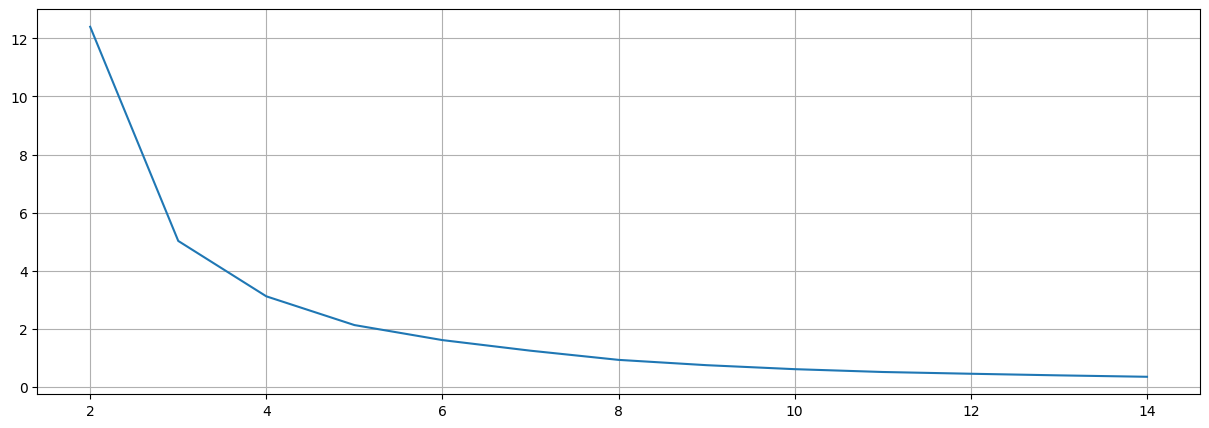

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(n_clusters, distortion)
plt.grid()

In [ ]:
km = KMeans(n_clusters = 6, max_iter = 10000, n_init = 100, random_state = 61658)
X_t = km.fit_predict(x)

In [ ]:
datavitimas.loc[:, "clus"] = X_t
datavitimas

,uf,ano,crime,mes,regiao,ocorrencias,vitima_Feminino,vitima_Masculino,vitima_Sexo NI,clus
0,ac,2015,3,abr,no,22.0,0,22,0,0
1,ac,2015,3,ago,no,13.0,0,13,0,0
2,ac,2015,3,dez,no,18.0,1,17,0,0
3,ac,2015,3,fev,no,10.0,1,9,0,0
4,ac,2015,3,jan,no,13.0,2,11,0,0
...,...,...,...,...,...,...,...,...,...,...
7281,to,2022,8,jun,no,2.0,0,2,0,0
7282,to,2022,8,mai,no,3.0,0,3,0,0
7283,to,2022,8,mar,no,1.0,1,0,0,0
7284,to,2022,8,nov,no,2.0,0,2,0,0


In [ ]:
datavitimas.loc[datavitimas.clus == 2]

,uf,ano,crime,mes,regiao,ocorrencias,vitima_Feminino,vitima_Masculino,vitima_Sexo NI,clus
14,ac,2016,3,dez,no,142.0,0,71,0,2
182,al,2015,3,abr,ne,126.0,9,118,0,2
183,al,2015,3,ago,ne,118.0,9,110,0,2
189,al,2015,3,mai,ne,120.0,6,115,0,2
193,al,2015,3,set,ne,115.0,2,114,0,2
...,...,...,...,...,...,...,...,...,...,...
6757,se,2020,3,abr,ne,94.0,5,89,0,2
6760,se,2020,3,fev,ne,69.0,2,67,0,2
6761,se,2020,3,jan,ne,79.0,5,74,0,2
6762,se,2020,3,jul,ne,69.0,2,67,0,2


# cod hermes

In [ ]:
datavitimas.describe()

,ano,crime,ocorrencias,vitima_Feminino,vitima_Masculino,vitima_Sexo NI
count,7286.000000,7286.000000,7286.000000,7286.000000,7286.000000,7286.000000
mean,2018.564645,4.986550,50.445237,4.340928,46.676228,1.873730
std,2.275984,2.176201,93.186883,8.435676,89.104004,14.502871
min,2015.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,2.000000,0.000000,1.000000,0.000000
50%,2019.000000,4.000000,6.000000,1.000000,5.000000,0.000000
75%,2021.000000,8.000000,52.000000,4.000000,45.000000,0.000000
max,2022.000000,8.000000,597.000000,61.000000,580.000000,242.000000


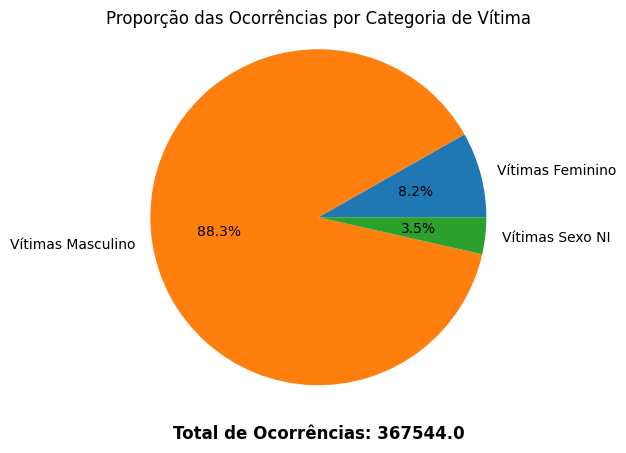

In [ ]:
totalvitimafeminino = datavitimas['vitima_Feminino'].sum()
totalvitimamasculino = datavitimas['vitima_Masculino'].sum()
totalNI = datavitimas['vitima_Sexo NI'].sum()
totalvitimas = totalvitimafeminino + totalvitimamasculino + totalNI



# Calcule a porcentagem das ocorrências com vítimas femininas
porcentagem_vitima_feminina = (totalvitimafeminino / totalvitimas) * 100

# Calcule a porcentagem das ocorrências com vítimas masculinas
porcentagem_vitima_masculina = (totalvitimamasculino / totalvitimas) * 100

# Calcule a porcentagem das ocorrências com vítimas de sexo não informado
porcentagem_vitima_NI = (totalNI / totalvitimas) * 100

# Crie uma lista com as porcentagens
porcentagens = [porcentagem_vitima_feminina, porcentagem_vitima_masculina, porcentagem_vitima_NI]

# Crie uma lista com as categorias
categorias = ['Vítimas Feminino', 'Vítimas Masculino', 'Vítimas Sexo NI']

# Adicionando labels informacionais
total_ocorrencias = datavitimas["ocorrencias"].sum()
label_text = f'Total de Ocorrências: {total_ocorrencias}'
plt.text(0.5, -0.1, label_text, ha='center', fontsize=12, weight='bold', transform=plt.gca().transAxes)
# Plote o gráfico de pizza
plt.pie(porcentagens, labels=categorias, autopct='%1.1f%%')
plt.title('Proporção das Ocorrências por Categoria de Vítima')
plt.axis('equal')
plt.show()


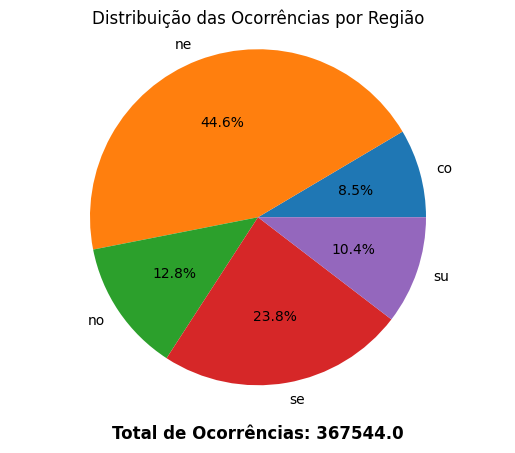

In [ ]:


# Agrupar os dados por região e somar as ocorrências
ocorrencias_por_regiao = datavitimas.groupby('regiao')['ocorrencias'].sum()

# Obter as regiões e as ocorrências correspondentes
regioes = ocorrencias_por_regiao.index
ocorrencias = ocorrencias_por_regiao.values

total_ocorrencias = ocorrencias_por_regiao.values.sum()
label_text = f'Total de Ocorrências: {total_ocorrencias}'
plt.text(0.5, -0.1, label_text, ha='center', fontsize=12, weight='bold', transform=plt.gca().transAxes)
# Plotar o gráfico de pizza
plt.pie(ocorrencias, labels=regioes, autopct='%1.1f%%')
plt.title('Distribuição das Ocorrências por Região')
plt.axis('equal')
plt.show()


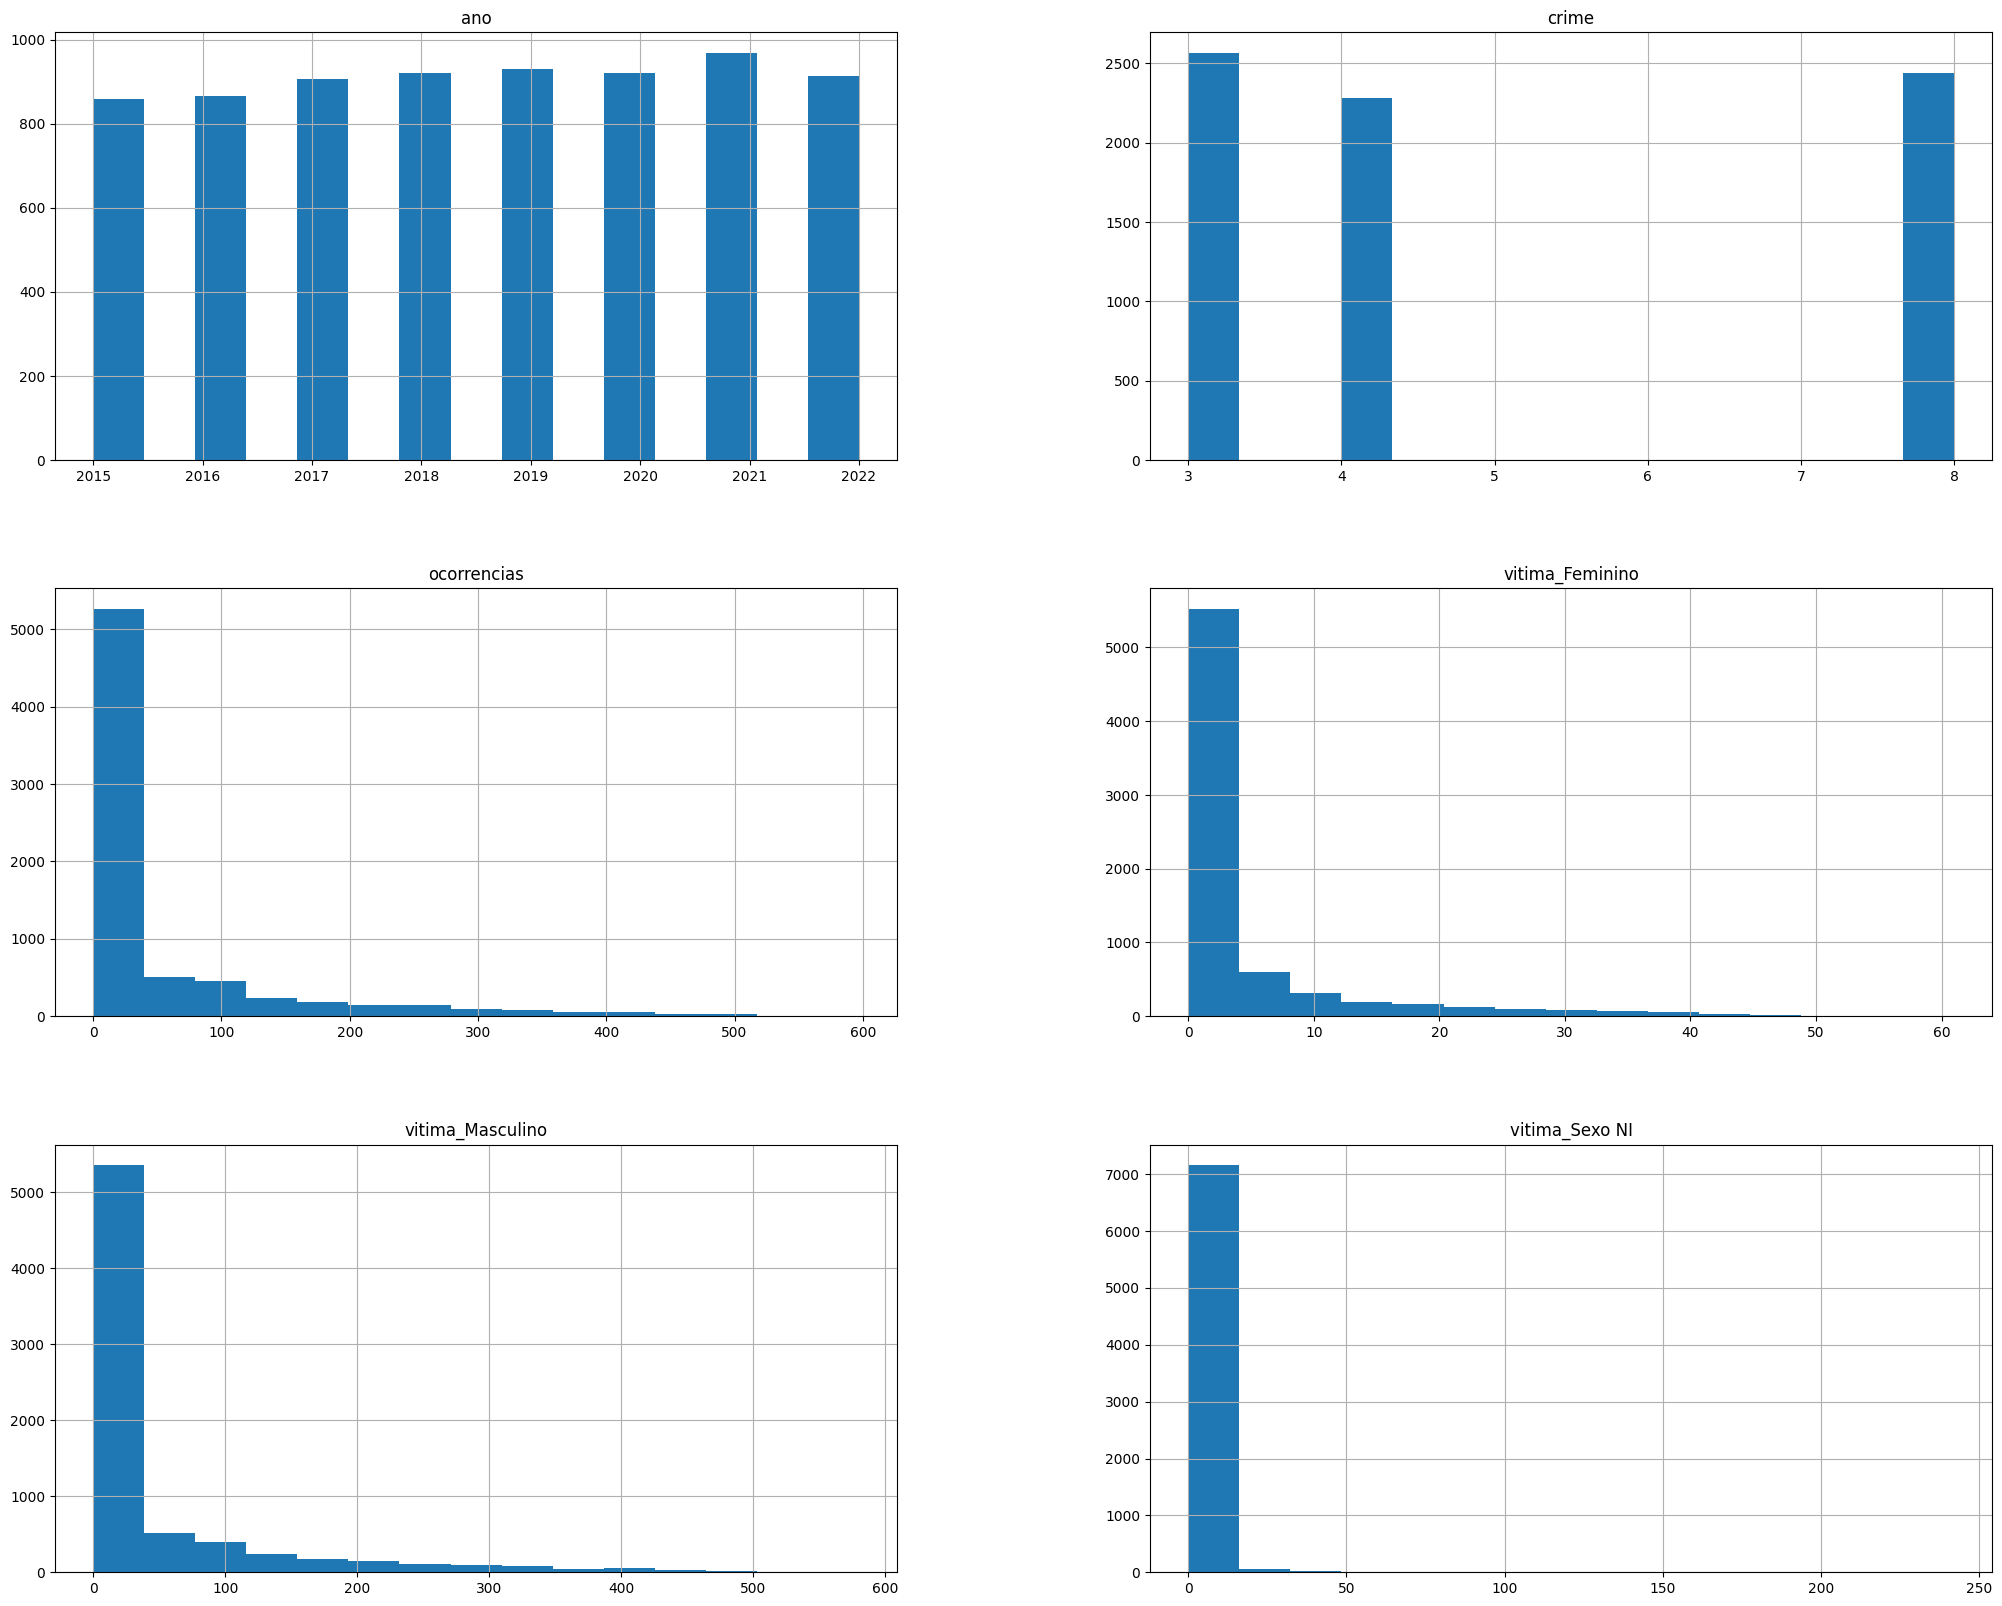

In [ ]:
datavitimas.hist(bins=15, figsize=(25,20))
plt.show()

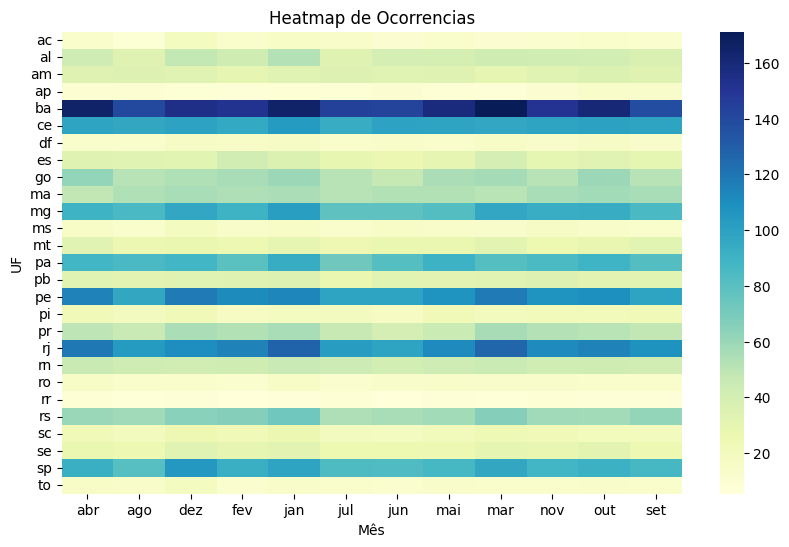

In [ ]:
pivot_table = datavitimas.pivot_table(index='uf', columns='mes', values='ocorrencias')
pivot_table2 = datavitimas.pivot_table(index='uf', columns='mes', values='vitima_Masculino')
pivot_table3 = datavitimas.pivot_table(index='uf', columns='mes', values='vitima_Feminino')
pivot_table4 = datavitimas.pivot_table(index='uf', columns='mes', values='vitima_Sexo NI')
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.heatmap(pivot_table, cmap='YlGnBu', fmt='g')  # Cria o heatmap
plt.title('Heatmap de Ocorrencias')  # Define o título do heatmap
plt.xlabel('Mês')  # Define o rótulo do eixo x
plt.ylabel('UF')  # Define o rótulo do eixo y
plt.show()  # Mostra o heatmap

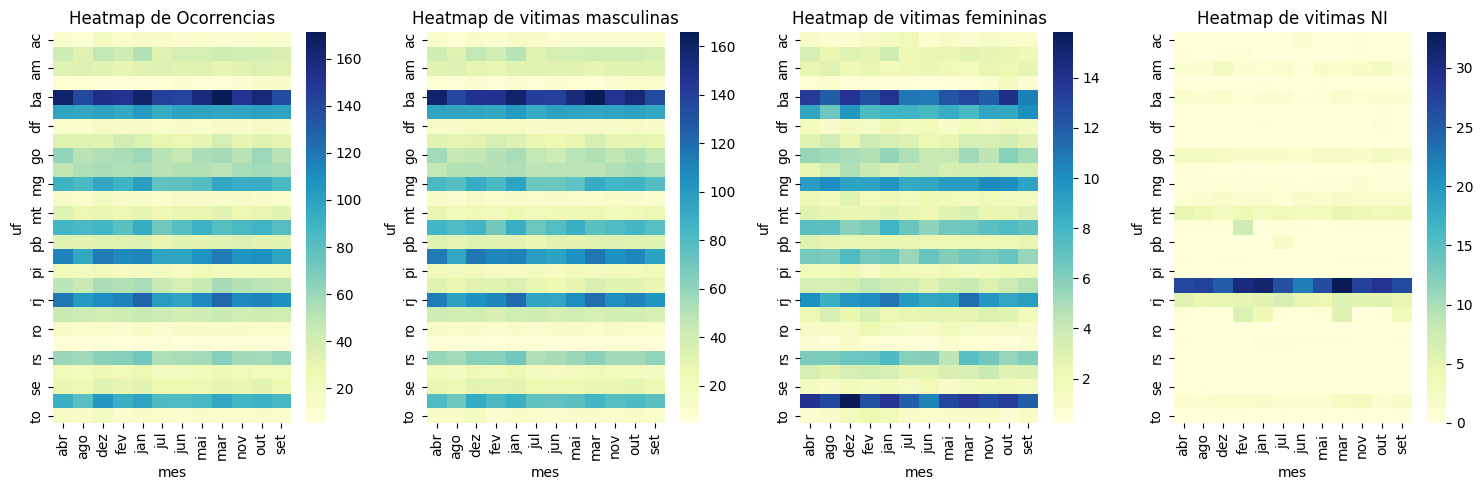

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criação da matriz de gráficos
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot da primeira pivot_table
axs[0].set_title('Heatmap de Ocorrencias')
sns.heatmap(pivot_table,cmap='YlGnBu', fmt='g', ax=axs[0])

# Plot da segunda pivot_table
axs[1].set_title('Heatmap de vitimas masculinas')
sns.heatmap(pivot_table2,cmap='YlGnBu', fmt='g', ax=axs[1])

# Plot da terceira pivot_table
axs[2].set_title('Heatmap de vitimas femininas')
sns.heatmap(pivot_table3,cmap='YlGnBu', fmt='g', ax=axs[2])

# Plot da quarta pivot_table
axs[3].set_title('Heatmap de vitimas NI')
sns.heatmap(pivot_table4,cmap='YlGnBu', fmt='g', ax=axs[3])

# Ajustes de espaçamento entre os gráficos
plt.tight_layout()

# Exibição dos gráficos
plt.show()


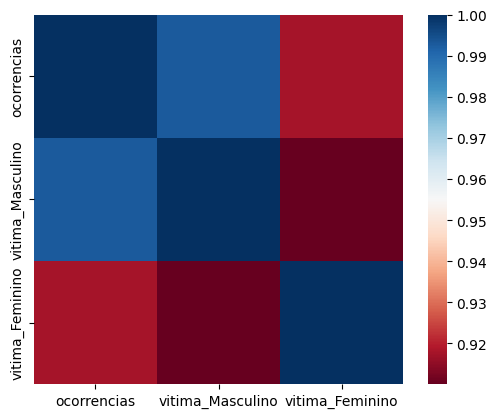

In [ ]:
corr = datavitimas[['ocorrencias','vitima_Masculino','vitima_Feminino']].corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white');

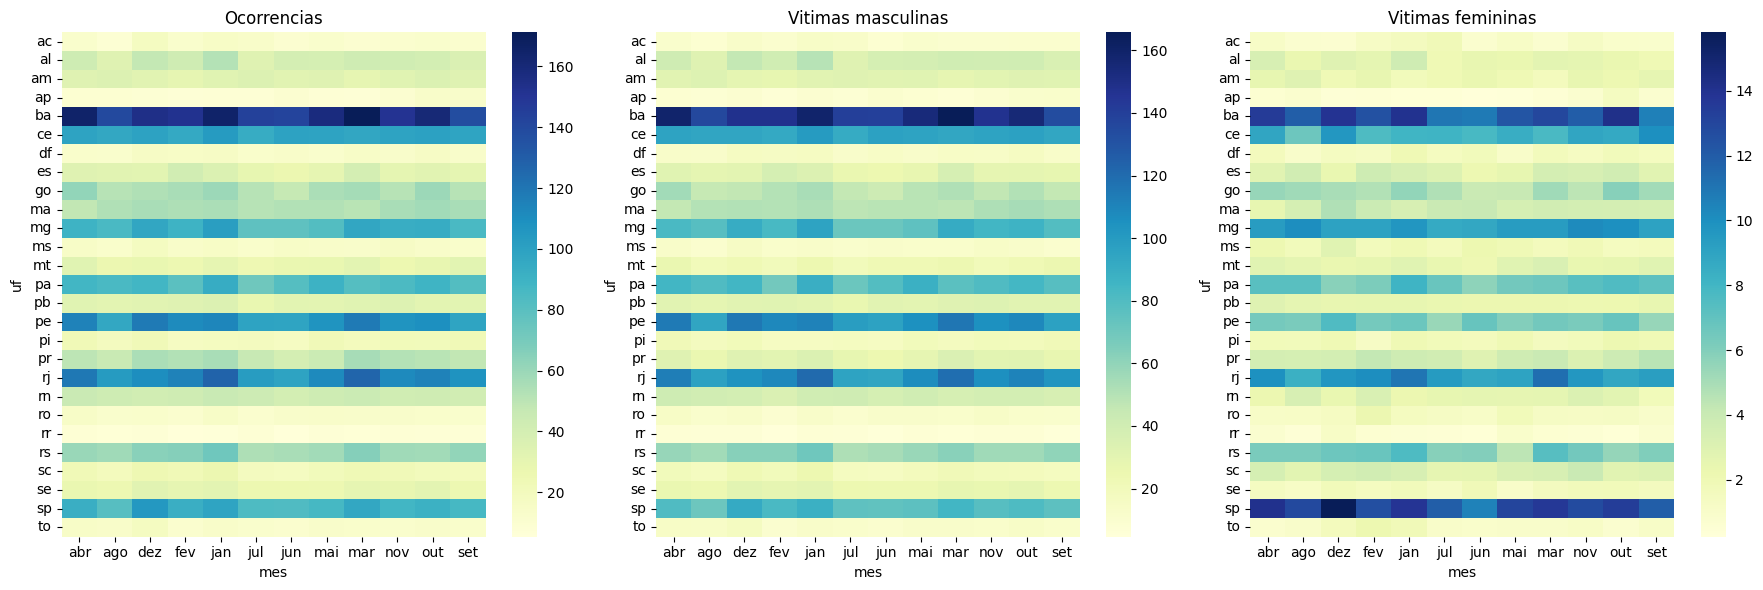

In [ ]:
# Crie a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plote o primeiro heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', fmt='g', ax=axes[0])
axes[0].set_title('Ocorrencias')

# Plote o segundo heatmap
sns.heatmap(pivot_table2, cmap='YlGnBu', fmt='g', ax=axes[1])
axes[1].set_title('Vitimas masculinas')

# Plote o terceiro heatmap
sns.heatmap(pivot_table3, cmap='YlGnBu', fmt='g', ax=axes[2])
axes[2].set_title('Vitimas femininas')

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exiba a figura
plt.show()

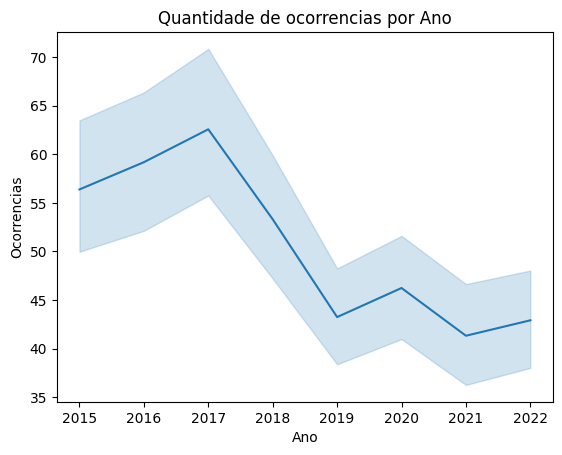

In [ ]:
sns.lineplot(data=datavitimas, x="ano", y="ocorrencias")

plt.title("Quantidade de ocorrencias por Ano")
plt.ylabel("Ocorrencias")
plt.xlabel("Ano")
plt.show()

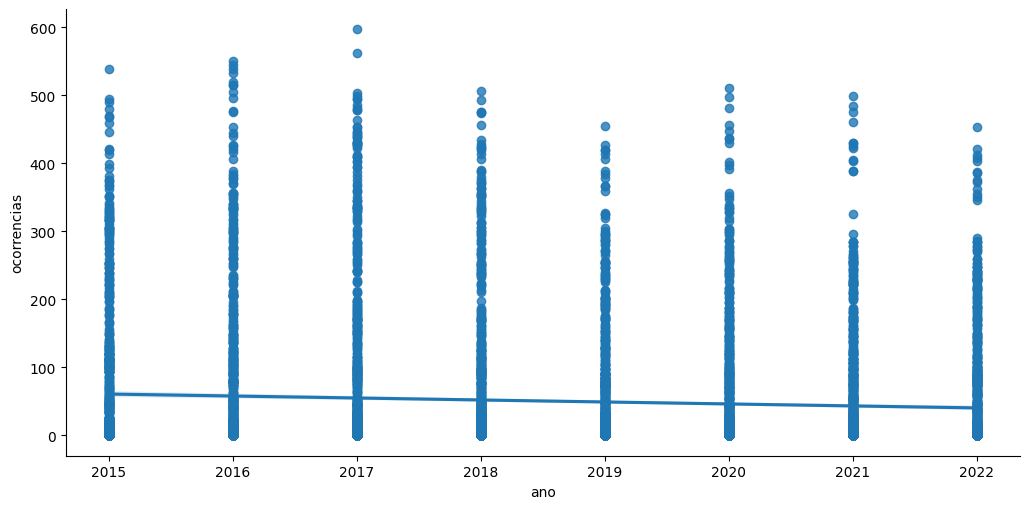

In [ ]:
sns.lmplot(x = "ano", y = "ocorrencias", data = datavitimas, height = 5.2, aspect = 2);

In [ ]:
plt.scatter(x=datavitimas.ano,y=datavitimas.ocorrencias)

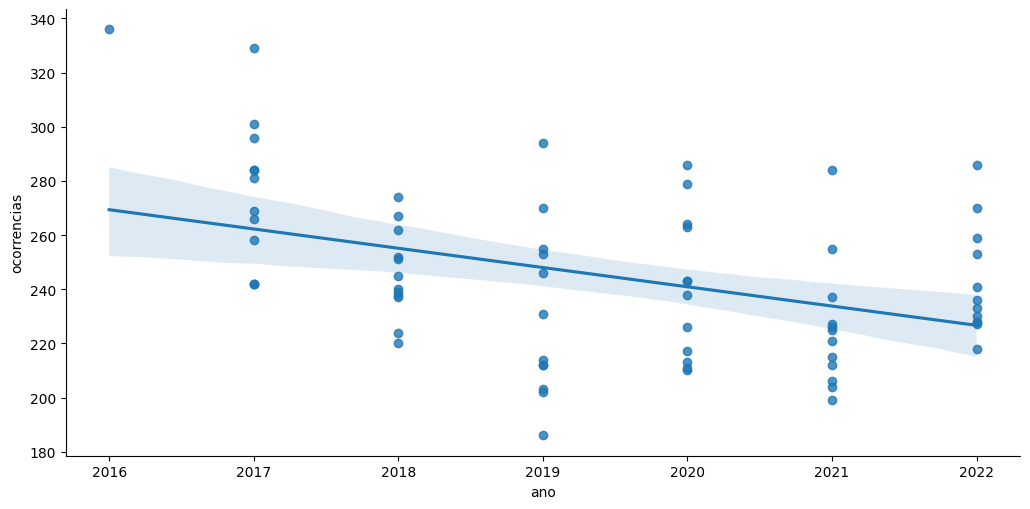

In [ ]:
datarj = datavitimas[datavitimas.uf == 'sp']
datarj2 = datarj[datarj.crime == 3]

sns.lmplot(x = "ano", y ='ocorrencias', data = datarj2, height = 5.2, aspect = 2);

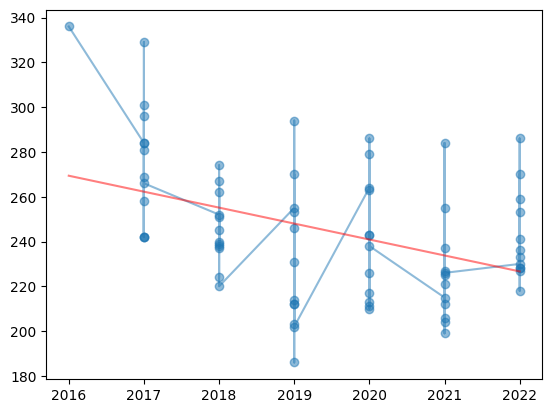

In [ ]:
from sklearn.linear_model import LinearRegression

x = datarj2[['ano']]
y = datarj2[['ocorrencias']]

model = LinearRegression()
model.fit(x, y)

y_hat = model.predict(x)

plt.figure()
plt.plot(x, y,'-o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)



In [ ]:
base[base.isnull().any(axis=1)]
estado = pd.DataFrame({})
estado['regiao'] = base['regiao']
estado['uf'] = base['uf']
estado['ano'] = base['ano']
estado['mes'] = base['mes']
estado['crime'] = base['crime']
estado['ocorrencias'] = base['ocorrencias']
estado['vitimas'] = base['vitimas']

estado.to_csv('b_estado.csv')
estado.head(50000)

,regiao,uf,ano,mes,crime,ocorrencias,vitimas
0,no,ac,2022,jan,3,10.0,2.0
1,no,ac,2022,jan,3,10.0,8.0
2,no,ac,2022,jan,3,10.0,0.0
3,no,ac,2022,fev,3,10.0,0.0
4,no,ac,2022,fev,3,10.0,10.0
...,...,...,...,...,...,...,...
35477,no,to,2015,dez,4,0.0,NaN
35478,no,to,2015,dez,5,6.0,NaN
35479,no,to,2015,dez,6,1.0,NaN
35480,no,to,2015,dez,7,55.0,NaN


Text(0.5, 0.98, 'Região Norte')

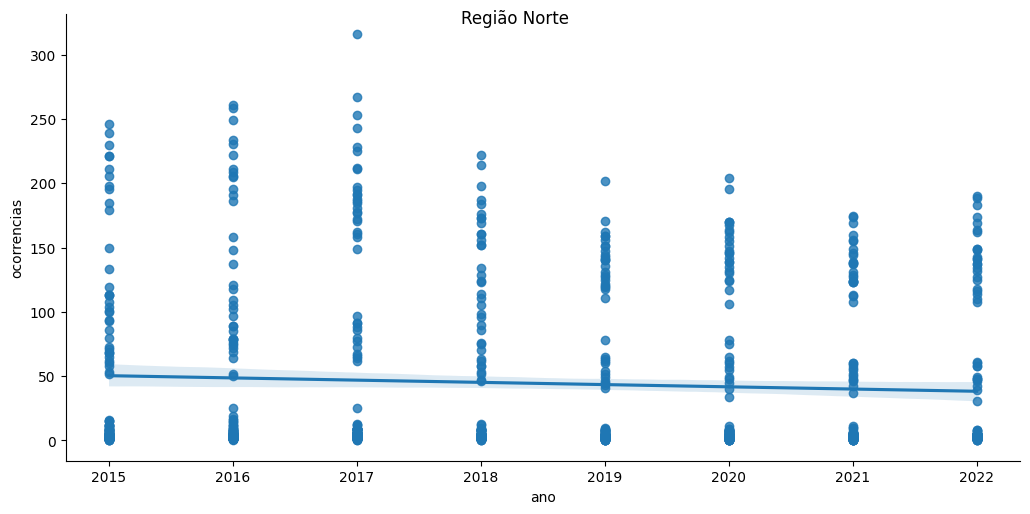

In [ ]:
dataregiao = datavitimas[datavitimas.regiao == 'su']
import seaborn as sns

fig = sns.lmplot(x="ano", y="ocorrencias", data=dataregiao, height=5.2, aspect=2)
fig.fig.suptitle('Região Norte')



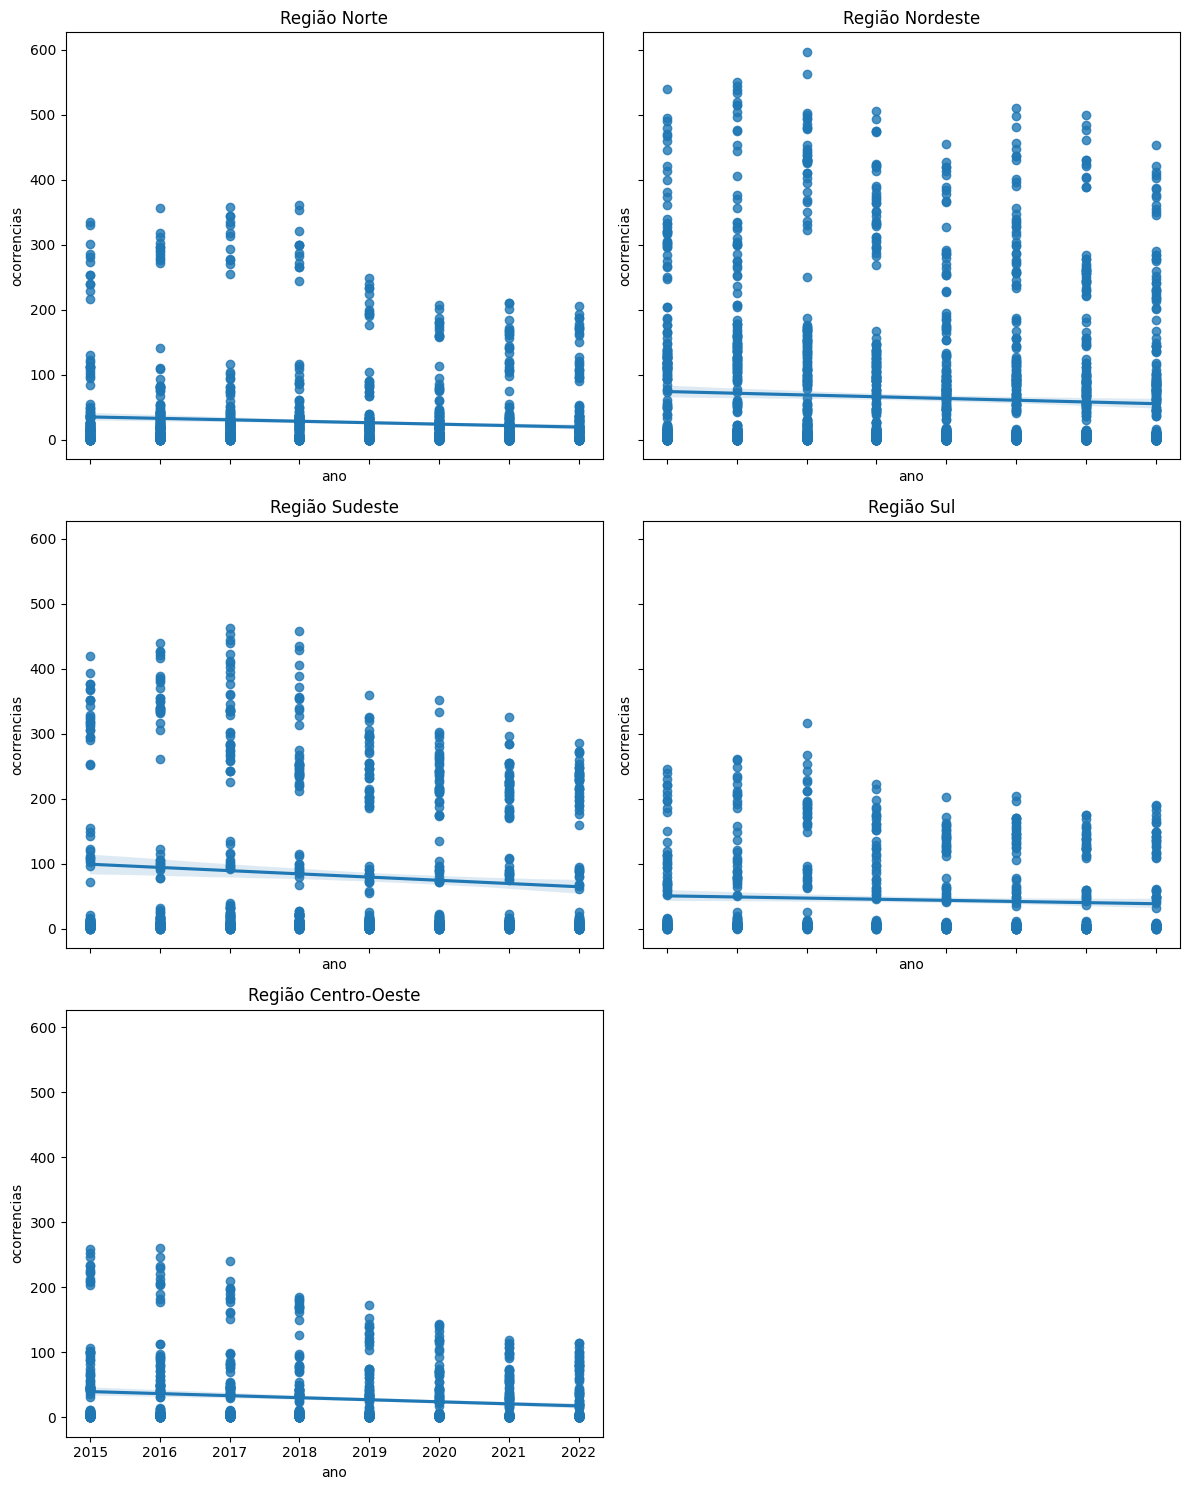

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento das siglas das regiões para seus nomes completos
regioes = {
    'no': 'Norte',
    'ne': 'Nordeste',
    'se': 'Sudeste',
    'su': 'Sul',
    'co': 'Centro-Oeste'
}

# Criação da matriz de gráficos
num_regioes = len(regioes)
num_colunas = 2
num_linhas = (num_regioes + num_colunas - 1) // num_colunas

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, num_linhas * 5), sharex=True, sharey=True)
axs = axs.flatten()

# Loop para plotar cada região
for i, regiao_sigla in enumerate(regioes.keys()):
    regiao_nome = regioes[regiao_sigla]
    data_regiao = datavitimas[datavitimas.regiao == regiao_sigla]
    ax = axs[i]
    sns.regplot(x="ano", y="ocorrencias", data=data_regiao, ax=ax)
    ax.set_title(f'Região {regiao_nome}')

# Remover eixos extras, se houver
if num_regioes < len(axs):
    for j in range(num_regioes, len(axs)):
        axs[j].remove()

# Ajustes de espaçamento entre os gráficos
plt.tight_layout()

# Exibição dos gráficos
plt.show()
